# Random Forests

In [3]:
# Processamento dos dados
import numpy  as np
import pandas as pd

In [4]:
# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Seleção de modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [6]:
# Módulo para armazenamento 
from sklearn.externals import joblib

In [7]:
# Métricas de Avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [10]:
# Conjuntos de treinamento
# Conjunto 1
conjunto1_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_1.csv')
conjunto1_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_1.csv')

# Conjunto 2
conjunto2_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_2.csv')
conjunto2_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_2.csv')

# Conjunto 3
conjunto3_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_3.csv')
conjunto3_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_3.csv')

# Conjunto 4
conjunto4_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_4.csv')
conjunto4_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_4.csv')

In [11]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_1.csv')
conjunto1_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_1.csv')

# Conjunto 2
conjunto2_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_2.csv')
conjunto2_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_2.csv')

# Conjunto 3
conjunto3_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_3.csv')
conjunto3_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_3.csv')

# Conjunto 4
conjunto4_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_4.csv')
conjunto4_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_4.csv')

## Pré-processamento dos dados

### Remoção de colunas inúteis

In [12]:
# Lista de csvs, para facilitar qualquer loop
df_data = [conjunto1_train, conjunto2_train ,conjunto3_train ,conjunto4_train,
           conjunto1_test, conjunto2_test  ,conjunto3_test  ,conjunto4_test]

df_target = [conjunto1_train_target, conjunto2_train_target, conjunto3_train_target, conjunto4_train_target,
             conjunto1_test_target, conjunto2_test_target , conjunto3_test_target , conjunto4_test_target]

In [13]:
# Remoção das colunas ids
for df_index in range(0,8):
    df_data[df_index].drop('id',axis=1,inplace=True)
    df_target[df_index].drop('id',axis=1,inplace=True)

In [14]:
# Codificação das features categóricas, utilizando get_dummies

def get_dummies_features(df):
    ''' Função utilizada para a codificação de features categóricas de um dataframe em features binárias'''
    output = pd.DataFrame(index = df.index)

    # Investigate each feature column for the data
    for col, col_data in df.iteritems():

        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        output = output.join(col_data)
    
    return output

In [15]:
# Convertendo os dataframes com dummies :

# Conjunto de treinamento
conjunto1_train = get_dummies_features(conjunto1_train)
conjunto2_train = get_dummies_features(conjunto2_train)
conjunto3_train = get_dummies_features(conjunto3_train)
conjunto4_train = get_dummies_features(conjunto4_train)

# Conjunto de teste
conjunto1_test = get_dummies_features(conjunto1_test)
conjunto2_test = get_dummies_features(conjunto2_test) 
conjunto3_test = get_dummies_features(conjunto3_test)
conjunto4_test = get_dummies_features(conjunto4_test)

## Treinamento

- Datasets balanceados
- Métrica utilizada: acurácia
- Profundidade da árvore: 5

## Datasets utilizados

São testados 4 conjuntos de dados: 

 - Dataset 1: 
 
 - Dataset 2:
 
 - Dataset 3:
 
 - Dataset 4:

In [11]:
# Classificador
from sklearn.ensemble  import RandomForestClassifier as RF
clf_RF  = RF()

### Random Forests

No algoritmo de Random Forests, dois hiperparâmetros podem ser variados: A quantidade de árvores que utilizaremos no modelo, e a profundidade da árvore. Neste trabalho utilizaremos a profundidade fixada em depth = 20, e iremos verificar o score da classificação a partir da quantidade de árvores utilizadas no ensemble.

In [30]:
# Teste base: Verificando o funcionamento correto do modelo para as configurações padrões: Max_Depth = None (Até max_split), e n_estimators = 10
clf_RF.fit(conjunto1_train,conjunto1_train_target.earnings)
prediction_conjunto1 = clf_RF.predict(conjunto1_test)
print('Acurácia para o conjunto 1: {:.2f}'.format(accuracy_score(conjunto1_test_target.earnings,prediction_conjunto1,normalize=True)))

clf_RF.fit(conjunto2_train,conjunto2_train_target.earnings)
prediction_conjunto2 = clf_RF.predict(conjunto2_test)
print('Acurácia para o conjunto 2: {:.2f}'.format(accuracy_score(conjunto2_test_target.earnings,prediction_conjunto2,normalize=True)))

clf_RF.fit(conjunto3_train,conjunto3_train_target.earnings)
prediction_conjunto3 = clf_RF.predict(conjunto3_test)
print('Acurácia para o conjunto 3: {:.2f}'.format(accuracy_score(conjunto3_test_target.earnings,prediction_conjunto3,normalize=True)))

clf_RF.fit(conjunto4_train,conjunto4_train_target.earnings)
prediction_conjunto4 = clf_RF.predict(conjunto4_test)
print('Acurácia para o conjunto 4: {:.2f}'.format(accuracy_score(conjunto4_test_target.earnings,prediction_conjunto4,normalize=True)))

Acurácia para o conjunto 1: 0.82
Acurácia para o conjunto 2: 0.78
Acurácia para o conjunto 3: 0.81
Acurácia para o conjunto 4: 0.80


#### Treinamento para cada dataset - Dataset 1



##### Hiperparâmetros

In [31]:
# Grid de árvores a serem utilizadas - Parâmetros variam de 5 a 50 árvores
number_trees_grid = list(range(5,101,5))
scores_treino, scores_validacao = validation_curve(RF(max_depth=4),
                                                   X=conjunto1_train,y=conjunto1_train_target.earnings,
                                                   param_name='n_estimators',param_range=number_trees_grid,
                                                   cv=10,scoring='accuracy',n_jobs=-1)

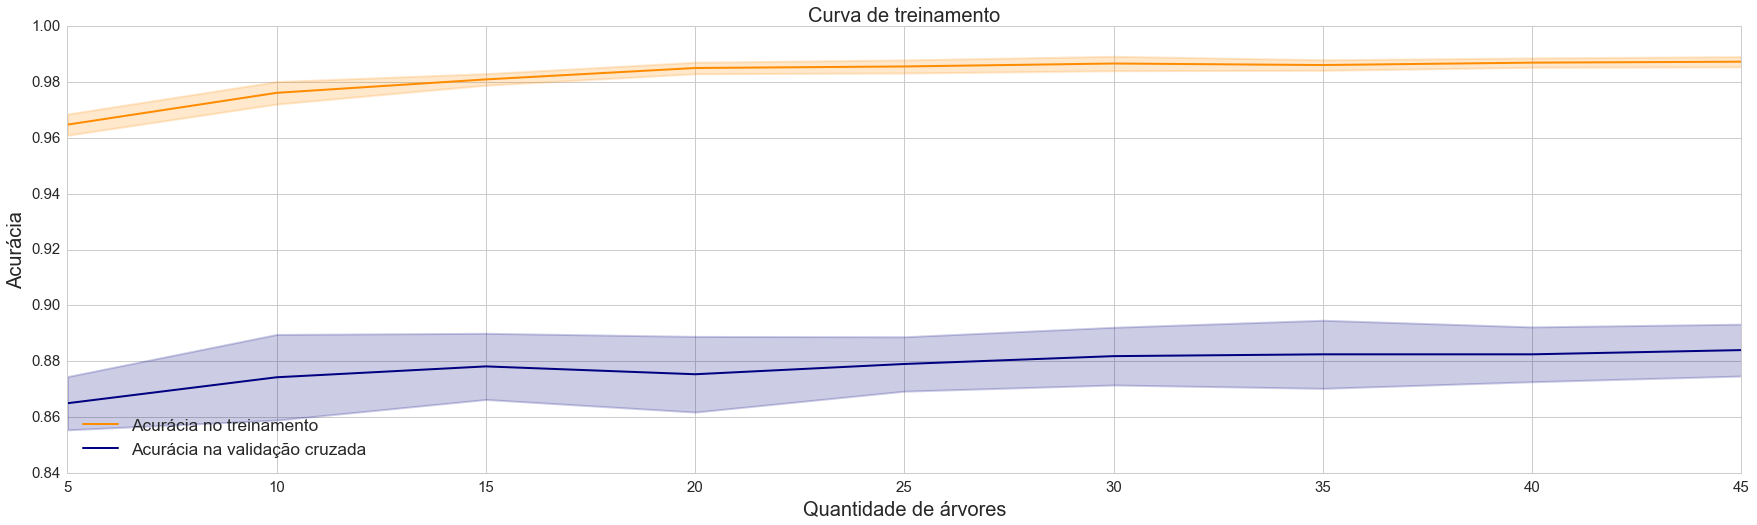

In [32]:
# Estatísticas do treino
train_scores_mean = np.mean(scores_treino   , axis=1)
train_scores_std  = np.std (scores_treino   , axis=1)
test_scores_mean  = np.mean(scores_validacao, axis=1)
test_scores_std   = np.std (scores_validacao, axis=1)

# Estilo do sns
sns.set_style('whitegrid')

# Parâmetros
param_range = number_trees_grid

# Ajuste dos subplots
plt.figure(figsize=(30,8))
plt.title('Curva de treinamento',fontsize=20)
plt.xlabel('Quantidade de árvores',fontsize=20)
plt.ylabel('Acurácia',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)


plt.plot(param_range[:20], train_scores_mean[:20], label="Acurácia no treinamento",color="darkorange", lw=lw)
plt.fill_between(param_range[:20], (train_scores_mean - train_scores_std)[:20],(train_scores_mean + train_scores_std)[:20], alpha=0.2,color="darkorange", lw=lw)
plt.plot(param_range[:20], test_scores_mean[:20], label="Acurácia na validação cruzada",color="navy", lw=lw)
plt.fill_between(param_range[:20], (test_scores_mean - test_scores_std)[:20],(test_scores_mean + test_scores_std)[:20], alpha=0.2,color="navy", lw=lw)
plt.legend(loc="best",fontsize='xx-large')
plt.show()

In [33]:
# Diferença na acurácia para n_estimators = 15 e n_estimators = 25
print('Diferença na acurácia para n_estimators = 15 e n_estimators = 25: {}'.format(abs(test_scores_mean[2] - test_scores_mean[4])))

Diferença na acurácia para n_estimators = 15 e n_estimators = 25: 0.0008658008658010141


O aumento da complexidade na tarefa de classificação para 15 árvores e 25 árvores é desnecessária para o ganho na acurácia!

#### Verificando o tempo para classificação: n=15 e n=25

In [34]:
# Novamente, um teste básico 
from timeit import default_timer as timer

inicio = timer()
clf_RF = RF(n_estimators=15,max_depth=20)
clf_RF.fit(conjunto1_train,conjunto1_train_target.earnings)
prediction_conjunto1 = clf_RF.predict(conjunto1_test)
fim = timer()

print(fim - inicio)

inicio = timer()
clf_RF = RF(n_estimators=25,max_depth=20)
clf_RF.fit(conjunto1_train,conjunto1_train_target.earnings)
prediction_conjunto1 = clf_RF.predict(conjunto1_test)
fim = timer()

print(fim - inicio)

0.11525022600108059
0.13623916399956215


#### Conclusão

Para a classificação, os valores de n_estimator = 15 e 25 não possuem diferenças significativas no tempo...

#### Treinamento do modelo para n_estimators = 15

In [35]:
# Classificador com n_estimators = 15
rf_clf = RF(n_estimators=15,max_depth=20,n_jobs=-1)

# Conjunto para treino/teste
dataset1_values  = pd.concat([conjunto1_train, conjunto1_test],ignore_index=True,axis=0)
dataset1_targets = pd.concat([conjunto1_train_target, conjunto1_test_target],ignore_index=True,axis=0)

# Fit do modelo para o conjunto de treinamento
cross_val_results_rf_1 = cross_val_score(rf_clf,dataset1_values,y=dataset1_targets.earnings,scoring='accuracy',cv=10)

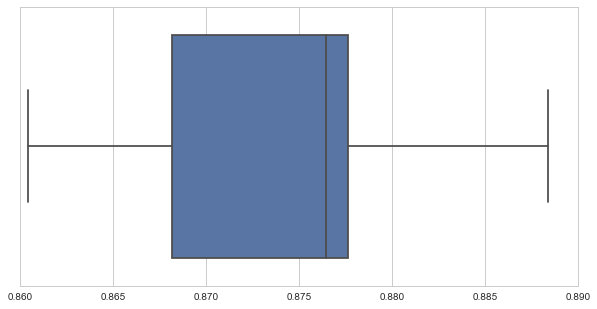

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(cross_val_results_rf_1,orient='h')
plt.show()

Com o valor de n_estimators = 15 e max_depth = 20, conseguimos um score acima do score base utilizando n_estimators = 10 e Max_depth = None. Como visto acima, o menor valor que conseguimos é melhor que a estimativa base anterior.

#### Treinamento para cada dataset - Dataset 2

##### Hiperparâmetros

In [37]:
# Grid de árvores a serem utilizadas - Parâmetros variam de 5 a 50 árvores
number_trees_grid = list(range(5,50,5))
scores_treino, scores_validacao = validation_curve(RF(max_depth=20),X=conjunto2_train,y=conjunto2_train_target.earnings,param_name='n_estimators',param_range=number_trees_grid,cv=10,scoring='accuracy',n_jobs=-1)

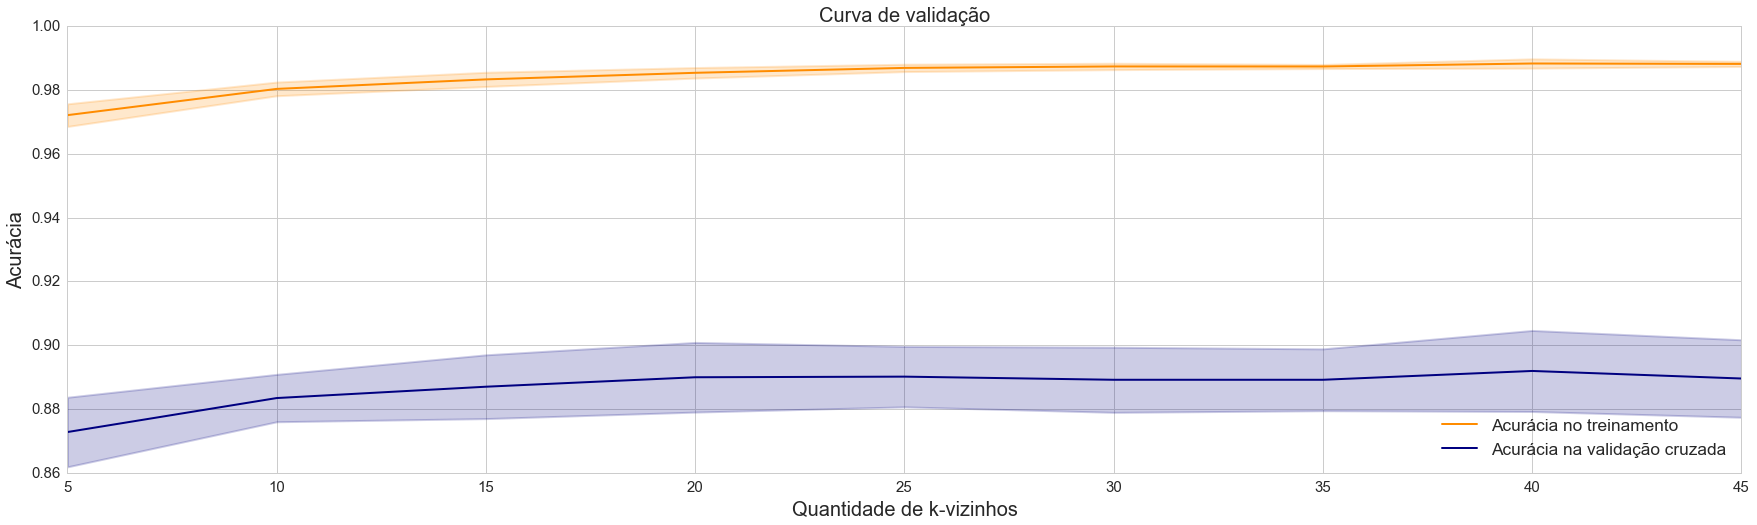

In [38]:
# Estatísticas do treino
train_scores_mean = np.mean(scores_treino   , axis=1)
train_scores_std  = np.std (scores_treino   , axis=1)
test_scores_mean  = np.mean(scores_validacao, axis=1)
test_scores_std   = np.std (scores_validacao, axis=1)

# Estilo do sns
sns.set_style('whitegrid')

# Parâmetros
param_range = number_trees_grid

# Ajuste dos subplots
plt.figure(figsize=(30,8))
plt.title('Curva de validação',fontsize=20)
plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
plt.ylabel('Acurácia',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)


plt.plot(param_range[:20], train_scores_mean[:20], label="Acurácia no treinamento",color="darkorange", lw=lw)
plt.fill_between(param_range[:20], (train_scores_mean - train_scores_std)[:20],(train_scores_mean + train_scores_std)[:20], alpha=0.2,color="darkorange", lw=lw)
plt.plot(param_range[:20], test_scores_mean[:20], label="Acurácia na validação cruzada",color="navy", lw=lw)
plt.fill_between(param_range[:20], (test_scores_mean - test_scores_std)[:20],(test_scores_mean + test_scores_std)[:20], alpha=0.2,color="navy", lw=lw)
plt.legend(loc="best",fontsize='xx-large')
plt.show()

#### Conclusão

n_estimators = 10 tá ok, né.

#### Treinamento do modelo para n_estimators = 10

In [39]:
# Classificador com n = 10
rf_clf = RF(n_estimators=10,max_depth=20,n_jobs=-1)

# Conjunto para treino/teste
dataset2_values  = pd.concat([conjunto2_train, conjunto2_test],ignore_index=True,axis=0)
dataset2_targets = pd.concat([conjunto2_train_target, conjunto2_test_target],ignore_index=True,axis=0)

# Fit do modelo para o conjunto de treinamento
cross_val_results_rf_2 = cross_val_score(rf_clf,dataset2_values,y=dataset2_targets.earnings,scoring='accuracy',cv=10)

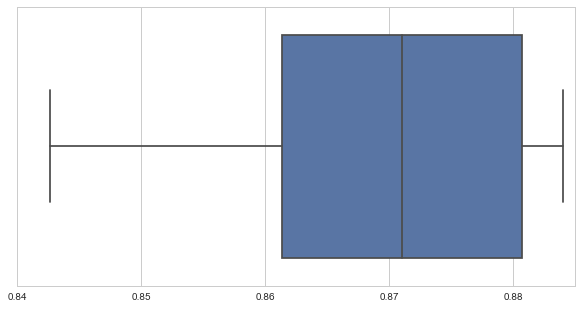

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(cross_val_results_rf_2,orient='h')
plt.show()

Com o valor de k=3 conseguimos um score acima do score base utilizando k=5. Como visto acima, o menor valor que conseguimos é melhor que a estimativa base anterior.

#### Treinamento para cada dataset - Dataset 3

##### Hiperparâmetros

In [41]:
# Grid de árvores a serem utilizadas - Parâmetros variam de 5 a 50 árvores
number_trees_grid = list(range(5,50,5))
scores_treino, scores_validacao = validation_curve(RF(max_depth=20),X=conjunto3_train,y=conjunto3_train_target.earnings,param_name='n_estimators',param_range=number_trees_grid,cv=10,scoring='accuracy',n_jobs=3)

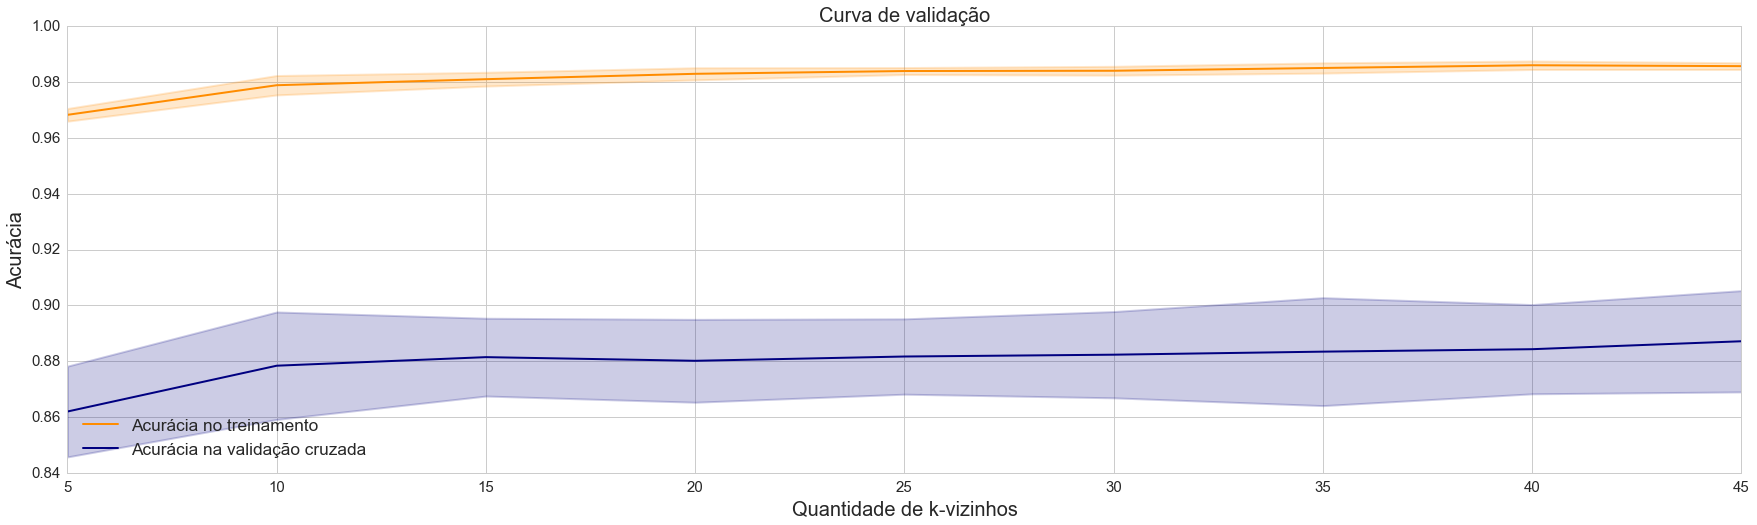

In [42]:
# Estatísticas do treino
train_scores_mean = np.mean(scores_treino   , axis=1)
train_scores_std  = np.std (scores_treino   , axis=1)
test_scores_mean  = np.mean(scores_validacao, axis=1)
test_scores_std   = np.std (scores_validacao, axis=1)

# Estilo do sns
sns.set_style('whitegrid')

# Parâmetros
param_range = number_trees_grid

# Ajuste dos subplots
plt.figure(figsize=(30,8))
plt.title('Curva de validação',fontsize=20)
plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
plt.ylabel('Acurácia',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)


plt.plot(param_range[:20], train_scores_mean[:20], label="Acurácia no treinamento",color="darkorange", lw=lw)
plt.fill_between(param_range[:20], (train_scores_mean - train_scores_std)[:20],(train_scores_mean + train_scores_std)[:20], alpha=0.2,color="darkorange", lw=lw)
plt.plot(param_range[:20], test_scores_mean[:20], label="Acurácia na validação cruzada",color="navy", lw=lw)
plt.fill_between(param_range[:20], (test_scores_mean - test_scores_std)[:20],(test_scores_mean + test_scores_std)[:20], alpha=0.2,color="navy", lw=lw)
plt.legend(loc="best",fontsize='xx-large')
plt.show()

#### Conclusão

Para o dataset 3, o hiperparâmetro pode ser escolhido como n_estimators = 15.

#### Treinamento do modelo para n_estimators = 15

In [43]:
# Classificador com n_estimators = 15
rf_clf = RF(n_estimators=15,n_jobs=-1)

# Conjunto para treino/teste
dataset3_values  = pd.concat([conjunto3_train, conjunto3_test],ignore_index=True,axis=0)
dataset3_targets = pd.concat([conjunto3_train_target, conjunto3_test_target],ignore_index=True,axis=0)

# Fit do modelo para o conjunto de treinamento
cross_val_results_rf_3 = cross_val_score(rf_clf,dataset3_values,y=dataset3_targets.earnings,scoring='accuracy',cv=10)

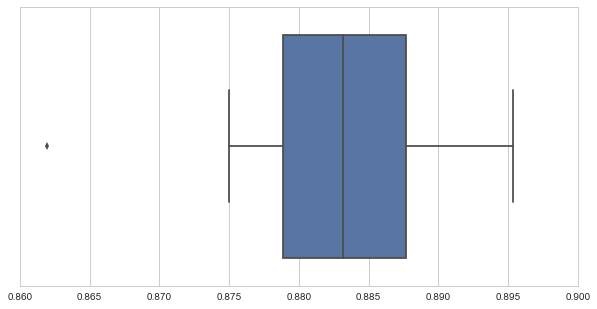

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(cross_val_results_rf_3,orient='h')
plt.show()

Com o valor de n_estimators = 15 conseguimos um score acima do score base utilizando n_estimators = 10. Como visto acima, o menor valor que conseguimos é melhor que a estimativa base anterior.

#### Treinamento para cada dataset - Dataset 4

##### Hiperparâmetros

In [45]:
# Grid de vizinhos próximos
number_trees_grid = list(range(5,50,5))
scores_treino, scores_validacao = validation_curve(RF(max_depth=20),X=conjunto4_train,y=conjunto4_train_target.earnings,param_name='n_estimators',param_range=number_trees_grid,cv=10,scoring='accuracy',n_jobs=-1)

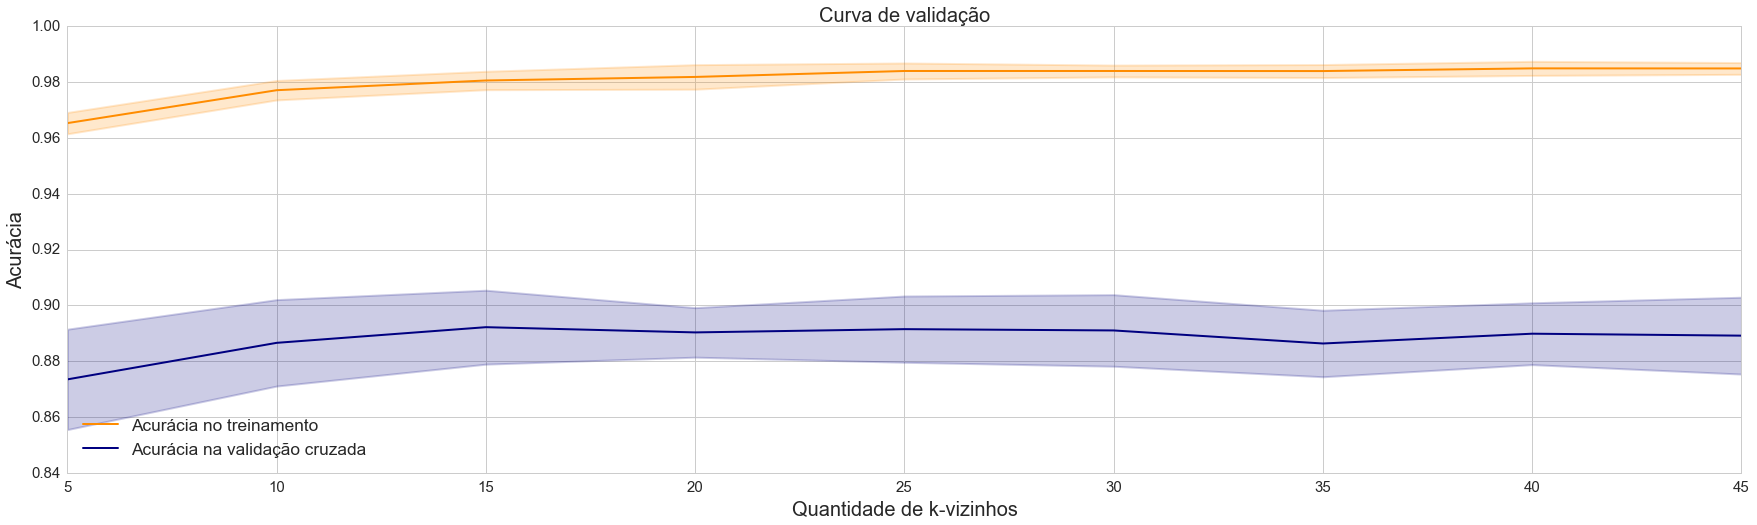

In [46]:
# Estatísticas do treino
train_scores_mean = np.mean(scores_treino   , axis=1)
train_scores_std  = np.std (scores_treino   , axis=1)
test_scores_mean  = np.mean(scores_validacao, axis=1)
test_scores_std   = np.std (scores_validacao, axis=1)

# Estilo do sns
sns.set_style('whitegrid')

# Parâmetros
param_range = number_trees_grid

# Ajuste dos subplots
plt.figure(figsize=(30,8))
plt.title('Curva de validação',fontsize=20)
plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
plt.ylabel('Acurácia',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)


plt.plot(param_range[:20], train_scores_mean[:20], label="Acurácia no treinamento",color="darkorange", lw=lw)
plt.fill_between(param_range[:20], (train_scores_mean - train_scores_std)[:20],(train_scores_mean + train_scores_std)[:20], alpha=0.2,color="darkorange", lw=lw)
plt.plot(param_range[:20], test_scores_mean[:20], label="Acurácia na validação cruzada",color="navy", lw=lw)
plt.fill_between(param_range[:20], (test_scores_mean - test_scores_std)[:20],(test_scores_mean + test_scores_std)[:20], alpha=0.2,color="navy", lw=lw)
plt.legend(loc="best",fontsize='xx-large')
plt.show()

#### Conclusão

Para o dataset 4, o hiperparâmetro pode ser escolhido como n_estimators = 15.

#### Treinamento do modelo para n_estimators = 15

In [49]:
# Classificador com n_estimators = 15
rf_clf = RF(n_estimators=15,n_jobs=-1)

# Conjunto para treino/teste
dataset4_values  = pd.concat([conjunto4_train, conjunto4_test],ignore_index=True,axis=0)
dataset4_targets = pd.concat([conjunto4_train_target, conjunto4_test_target],ignore_index=True,axis=0)

# Fit do modelo para o conjunto de treinamento
cross_val_results_rf_4 = cross_val_score(rf_clf,dataset4_values,y=dataset4_targets.earnings,scoring='accuracy',cv=10)

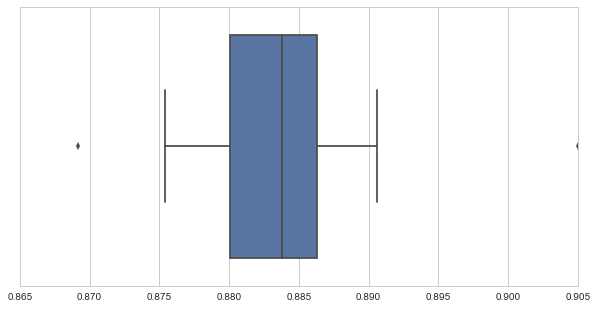

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(cross_val_results_rf_4,orient='h')
plt.show()

Com o valor de n_estimators = 15, conseguimos um score acima do score base utilizando n_estimators = 10. Como visto acima, o menor valor que conseguimos é melhor que a estimativa base anterior.

### Resumo dos modelos

Um resumo dos modelos Random Forests e k-Nearest Neighbors para os datasets balanceados 

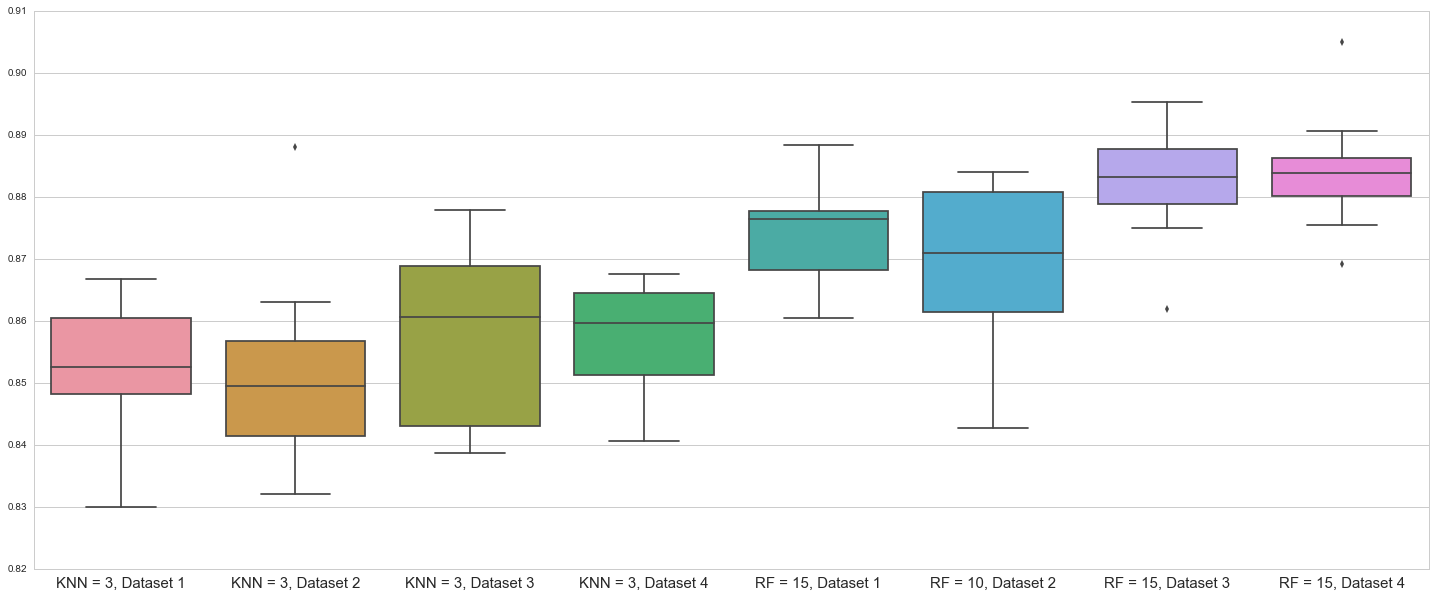

In [51]:
modelos = [cross_val_results_knn_1, cross_val_results_knn_2, cross_val_results_knn_3, cross_val_results_knn_4,
            cross_val_results_rf_1,  cross_val_results_rf_2,  cross_val_results_rf_3, cross_val_results_rf_4]

labels = ['KNN = 3, Dataset 1', 'KNN = 3, Dataset 2', 'KNN = 3, Dataset 3', 'KNN = 3, Dataset 4',
          'RF = 15, Dataset 1', 'RF = 10, Dataset 2', 'RF = 15, Dataset 3', 'RF = 15, Dataset 4'] # Cada modelo

plt.figure(figsize=(25,10))
sns.boxplot(data=modelos)
plt.xticks(list(range(0,8)),labels,fontsize=15)

plt.show()

### Redes neurais

Para a utilização da rede neural como um classificador, devemos definir alguns parâmetros, tais como a quantidade de camadas escondidas, a quantidade de neurônios em cada camada escondida, a quantidade de nós na saída e a função erro a ser utilizada. Os seguintes parâmetros foram escolhidos:

- Neurônios na saída: sigmoid, 1 neurônio
- Função de ativação: ReLU
- Função erro: Entropia cruzada

O treinamento da rede neural é feito utilizando o pacote Keras em conjunto com o tensorflow.

In [11]:
# Importando o keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [15]:
train  = conjunto1_train.values
target = (conjunto1_train_target.earnings.replace(-1,0)).values

In [16]:
# Exemplo de rede - teste básico

# Criação de uma rede
model = Sequential()
model.add(Dense(100, input_shape=(37,), activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Problema de classificação binária,
model.compile(optimizer='NAdam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# TensorBoard
from keras.callbacks import TensorBoard
from time import time
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0,write_graph=True, write_images=True)

In [18]:
# Treinamento da rede
model.fit(train, target, epochs=50, batch_size=50,callbacks=[tbCallBack])

Epoch 1/50
4620/4620 [==============================] - 0s - loss: 0.4895 - acc: 0.7634     
Epoch 2/50
4620/4620 [==============================] - 0s - loss: 0.4023 - acc: 0.8149     
Epoch 3/50
4620/4620 [==============================] - 0s - loss: 0.3941 - acc: 0.8190     
Epoch 4/50
4620/4620 [==============================] - 0s - loss: 0.3834 - acc: 0.8219     
Epoch 5/50
4620/4620 [==============================] - 0s - loss: 0.3806 - acc: 0.8297     
Epoch 6/50
4620/4620 [==============================] - 0s - loss: 0.3763 - acc: 0.8294     
Epoch 7/50
4620/4620 [==============================] - 0s - loss: 0.3732 - acc: 0.8258     
Epoch 8/50
4620/4620 [==============================] - 0s - loss: 0.3699 - acc: 0.8299     
Epoch 9/50
4620/4620 [==============================] - 0s - loss: 0.3654 - acc: 0.8346     
Epoch 10/50
4620/4620 [==============================] - 0s - loss: 0.3630 - acc: 0.8325     
Epoch 11/50
4620/4620 [==============================] - 0s - loss: 0

# Modelo escroto

In [ ]:
# Diz que é 1 se for (branco ou usa ou homem)


In [6]:
# Lista de csvs, para facilitar qualquer loop
df_data        = [conjunto1_train, conjunto2_train ,conjunto3_train ,conjunto4_train,
                   conjunto1_test, conjunto2_test  ,conjunto3_test  ,conjunto4_test]

df_target      = [conjunto1_train_target, conjunto2_train_target, conjunto3_train_target, conjunto4_train_target,
                  conjunto1_test_target, conjunto2_test_target , conjunto3_test_target , conjunto4_test_target]